In [5]:
# 1) Basic imports
import pandas as pd
import numpy as np

# 2) Load CSV
df = pd.read_csv(r"C:\Users\manha\OneDrive\Documents\CodeAlpha_DiseasePrediction\data\diabetes.csv") 
# 3) Quick peek
print("Rows, Columns:", df.shape)
df.head()


Rows, Columns: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

# Suppose target column is named "Outcome" for diabetes (0 = no, 1 = yes)
X = df.drop("Outcome", axis=1)  # features
y = df["Outcome"]               # target

# Split: 80% train, 20% test, random_state fixes randomness so results are repeatable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (614, 8) Test size: (154, 8)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# We will scale features with StandardScaler inside a pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

# Train
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]  # probability for positive class


Accuracy: 0.7532467532467533

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC AUC: 0.8146923783287419


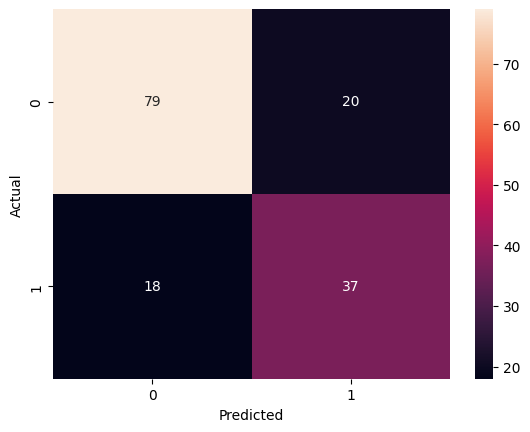

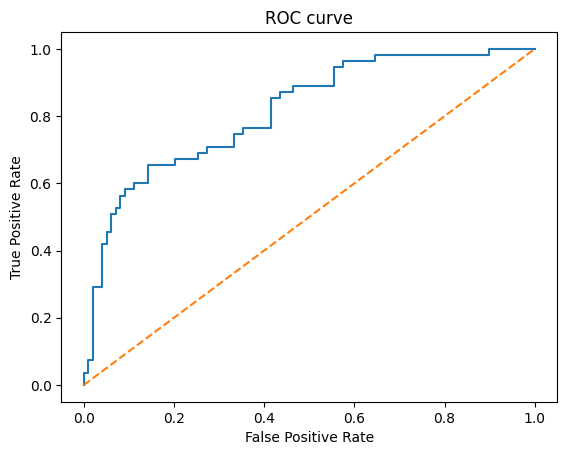

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Simple metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ROC AUC
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)

# ROC curve (optional)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF ROC AUC:", roc_auc_score(y_test, y_proba_rf))


RF Accuracy: 0.7207792207792207
RF ROC AUC: 0.8120293847566575


In [11]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]

print("XGB Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGB ROC AUC:", roc_auc_score(y_test, y_proba_xgb))


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
results = {
    "Model": ["LogisticRegression", "RandomForest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "ROC_AUC": [
        roc_auc_score(y_test, y_proba),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_xgb)
    ]
}
results_df = pd.DataFrame(results)
results_df


In [12]:
import joblib
joblib.dump(rf, "C:/Users/manha/OneDrive/Documents/CodeAlpha_DiseasePrediction/models/random_forest_model.joblib")

['C:/Users/manha/OneDrive/Documents/CodeAlpha_DiseasePrediction/models/random_forest_model.joblib']